# Data Mining: Clustering using kmeans

**Step 1:** import needed packages

In [1]:
import numpy as np
from sklearn.cluster import KMeans

**Step 2:** Load the dataset (data_UFAZ/Wholesale customers data.csv). Output the first five rows to inspect the data content.

In [2]:
import pandas as pd

data_csv = pd.read_csv("Wholesale customers data.csv")

# Output the first five rows
print(data_csv.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


**Step 3:** print the statistics of the data

In [3]:
# Print statistics of the data
print(data_csv.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

**Step 4:** standardizing the data

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data_csv)

# Convert the scaled data back to a DataFrame (optional)
data_scaled = pd.DataFrame(data_scaled, columns=data_csv.columns)

# Output the first five rows of the scaled data
print(data_scaled.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


**Step 5:** Print the statistics of scaled data

In [5]:
# Print statistics of the scaled data
print(data_scaled.describe())

            Channel        Region         Fresh        Milk       Grocery  \
count  4.400000e+02  4.400000e+02  4.400000e+02  440.000000  4.400000e+02   
mean   1.614870e-17  3.552714e-16 -3.431598e-17    0.000000 -4.037175e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00    1.001138  1.001138e+00   
min   -6.902971e-01 -1.995342e+00 -9.496831e-01   -0.778795 -8.373344e-01   
25%   -6.902971e-01 -7.023369e-01 -7.023339e-01   -0.578306 -6.108364e-01   
50%   -6.902971e-01  5.906683e-01 -2.767602e-01   -0.294258 -3.366684e-01   
75%    1.448652e+00  5.906683e-01  3.905226e-01    0.189092  2.849105e-01   
max    1.448652e+00  5.906683e-01  7.927738e+00    9.183650  8.936528e+00   

             Frozen  Detergents_Paper    Delicassen  
count  4.400000e+02      4.400000e+02  4.400000e+02  
mean   3.633457e-17      2.422305e-17 -8.074349e-18  
std    1.001138e+00      1.001138e+00  1.001138e+00  
min   -6.283430e-01     -6.044165e-01 -5.402644e-01  
25%   -4.804306e-01     -5.511349e-0

**Step 6**: Define the kmeans function with 2 clusters and fit the k-means algorithm on scaled data

In [6]:
from sklearn.cluster import KMeans

def kmeans(data_scaled):
    # Define the number of clusters
    k = 2
    
    # Initialize KMeans object
    kmeans = KMeans(n_clusters=k)
    
    # Fit the k-means algorithm on scaled data
    kmeans.fit(data_scaled)
    
    # Return the fitted kmeans object
    return kmeans

# Call the kmeans function with scaled data
kmeans_model = kmeans(data_scaled)

C:\Users\haJy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Step 7:** Use the inertia method to find the good number of clusters. Try clusters form 1 to 20

In [7]:
import matplotlib.pyplot as plt

# Initialize an empty list to store inertia values
inertia_values = []

# Try clusters from 1 to 20
for k in range(1, 21):
    # Initialize KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the k-means algorithm on scaled data
    kmeans.fit(data_scaled)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

C:\Users\haJy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\haJy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\haJy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\haJy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

**Step 8:** Convert the results into a dataframe and plotting them

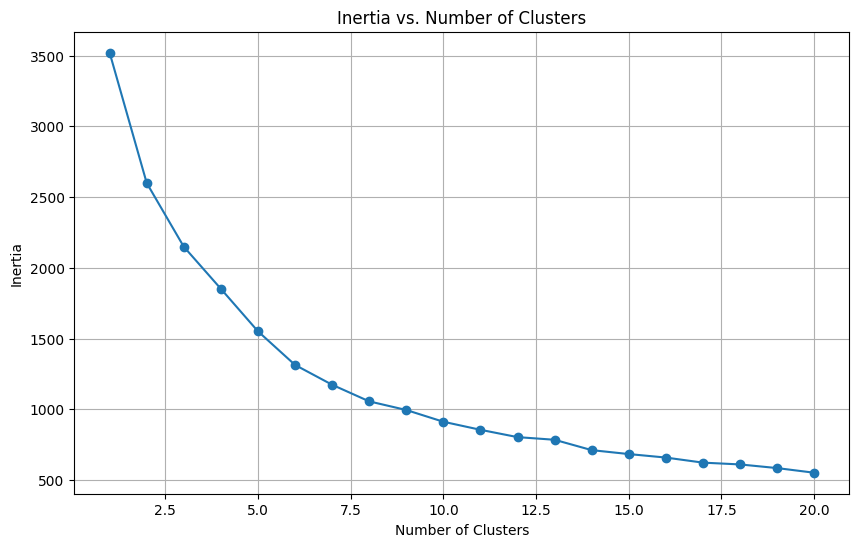

In [8]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame({
    'Number of Clusters': range(1, 21),
    'Inertia': inertia_values
})

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_df['Number of Clusters'], results_df['Inertia'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

**Step 9**: Define the kmeans function with the best umber of clusters and fit the k-means algorithm on scaled data

In [9]:
def kmeans(data_scaled, num_clusters):
    # Initialize KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit the k-means algorithm on scaled data
    kmeans.fit(data_scaled)
    
    # Return the fitted kmeans object
    return kmeans

# Get the best number of clusters based on the elbow method
best_num_clusters = 5  # Adjust this based on the plot

# Call the kmeans function with scaled data and the best number of clusters
kmeans_model = kmeans(data_scaled, best_num_clusters)

C:\Users\haJy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Step 10 :** Predict the clusters of the scaled data

In [10]:
# Predict the clusters of the scaled data
cluster_labels = kmeans_model.predict(data_scaled)

# Add the cluster labels to the original DataFrame
data_with_clusters = data_csv.copy()  # Make a copy of the original data
data_with_clusters['Cluster'] = cluster_labels

# Display the first few rows of the data with cluster labels
print(data_with_clusters.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        1  
1        1776        1  
2        7844        1  
3        1788        3  
4        5185        1  


**Step 11 :** Create a data frame that merge scaled data and their clusters 

In [11]:
# Convert cluster labels to DataFrame
cluster_labels_df = pd.DataFrame(cluster_labels, columns=['Cluster'])

# Concatenate scaled data and cluster labels
merged_data = pd.concat([data_scaled, cluster_labels_df], axis=1)

# Display the first few rows of the merged DataFrame
print(merged_data.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  Cluster  
0         -0.043569   -0.066339        1  
1          0.086407    0.089151        1  
2          0.133232    2.243293        1  
3         -0.498588    0.093411        3  
4         -0.231918    1.299347        1  


**Step 12 :** Print the distribution of each cluster

In [12]:
# Print the distribution of each cluster
cluster_distribution = merged_data['Cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_distribution)

Cluster Distribution:
Cluster
3    207
1    126
2     91
4     10
0      6
Name: count, dtype: int64


# Data Mining: Basket Analysis

**Step 1:** Load the dataset (data_UFAZ/Online_Retail.xlsx). Output the first five rows to inspect the data content.

In [13]:
import pandas as pd

data_excel = pd.read_excel("Online Retail.xlsx")

print(data_excel.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


**Step 2:** Check some statistics using the function `.describe()`.

In [14]:
data_excel.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Data Preprocessing

**Step 3:** Data cleaning: remove the extra spaces in the column `Description` using the function `.str.strip()`.

In [15]:
print(data_excel)
data_excel['Description'] = data_excel['Description'].str.strip()


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

**Step 4:** Drop the rows that are without Invoice Number using the function `df.dropna`.  drop also products without a defined category.

In [16]:
data_excel = data_excel.dropna(subset=['InvoiceNo','Description'])
data_excel

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Step 5:** Make the `InvoiceNo` column values as string using the function `astype('str')`.

In [17]:
data_excel['InvoiceNo'] = data_excel['InvoiceNo'].astype('str')

# One Hot Encode

**Step 6:** Extract InvoiceNo and Description from the dataframe. Use then the groupby function and convert the Description field to a list

In [18]:
invoice_description = data_excel[['InvoiceNo', 'Description']]

data_new = invoice_description.groupby('InvoiceNo')['Description'].agg(list).reset_index()
print(data_new)


      InvoiceNo                                        Description
0        536365  [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
1        536366  [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
2        536367  [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
3        536368  [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
4        536369                         [BATH BUILDING BLOCK WORD]
...         ...                                                ...
24440   C581484                      [PAPER CRAFT , LITTLE BIRDIE]
24441   C581490  [VICTORIAN GLASS HANGING T-LIGHT, ZINC T-LIGHT...
24442   C581499                                           [Manual]
24443   C581568                       [VICTORIAN SEWING BOX LARGE]
24444   C581569  [HANGING HEART JAR T-LIGHT HOLDER, 36 PENCILS ...

[24445 rows x 2 columns]


**step 7** Plot the 50 largest categories of transactions.

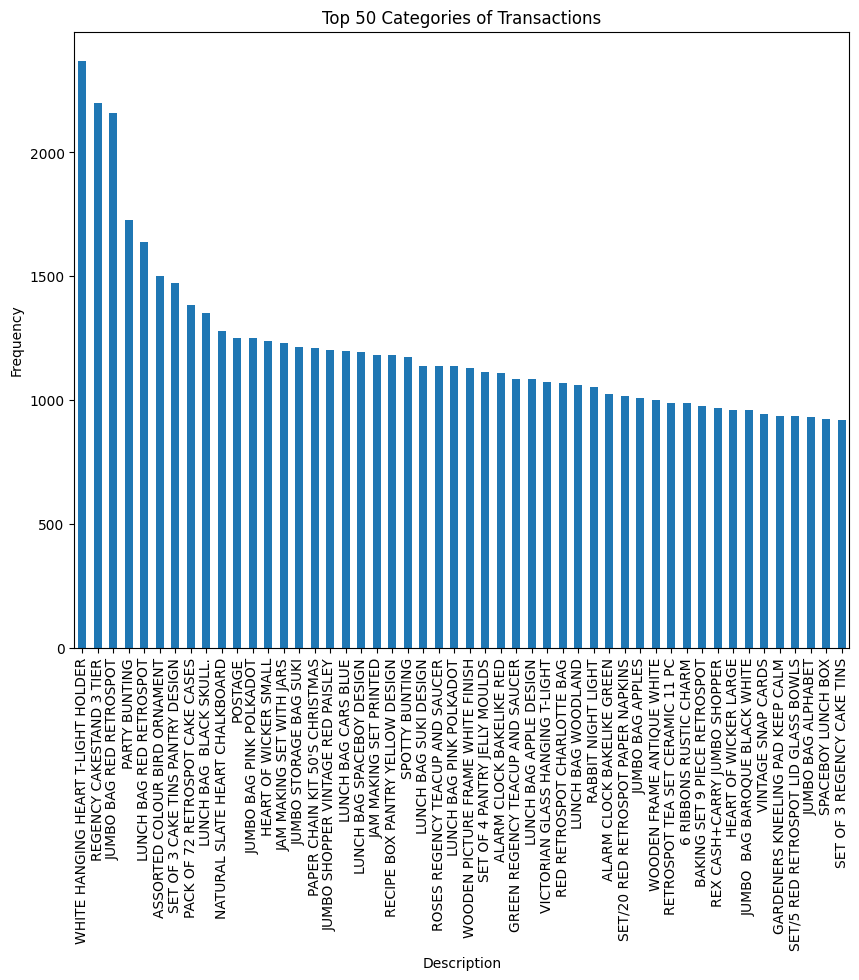

In [19]:
import matplotlib.pyplot as plt
description_counts = data_new['Description'].explode().value_counts()
top_50_categories = description_counts.head(50)

plt.figure(figsize=(10, 8))
top_50_categories.plot(kind='bar')
plt.title('Top 50 Categories of Transactions')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**Step 8** To view the list of country in the dataset, apply Country.unique(). Apply the one hot encoding to France

In [20]:
unique_countries = data_excel['Country'].unique()
print("Unique Countries:", unique_countries)
data_excel['IsFrance'] = (data_excel['Country'] == 'France').astype(int)

Unique Countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


**Step 9** One hot encoding

In [21]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(data_new['Description'])

# Transform lists into one-hot encoded array.
onehot = encoder.transform(data_new['Description'])

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
onehot

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24441,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24442,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24443,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
onehot.head()

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Step 10** Compute the support metric

In [23]:
support_metric = onehot.mean()
print(support_metric)


*Boombox Ipod Classic           0.000041
*USB Office Mirror Ball         0.000082
10 COLOUR SPACEBOY PEN          0.013336
12 COLOURED PARTY BALLOONS      0.006709
12 DAISY PEGS IN WOOD BOX       0.003150
                                  ...   
wrongly marked carton 22804     0.000041
wrongly marked. 23343 in box    0.000041
wrongly sold (22719) barcode    0.000041
wrongly sold as sets            0.000041
wrongly sold sets               0.000041
Length: 4210, dtype: float64


**Step 11** Compute the item count distribution over transactions

In [24]:
item_counts = onehot.sum(axis=1)
print(item_counts.value_counts())


1      4439
2      1590
3      1080
4       812
5       791
       ... 
358       1
315       1
344       1
320       1
731       1
Name: count, Length: 369, dtype: int64


**Step 12** what you remark ?

Confidence are different

**Step 13** Compute joint support for COLOURED PARTY BALLOONS and MESSAGE CARDS WITH ENVELOPES.

In [25]:
joint_support = (onehot['12 COLOURED PARTY BALLOONS'] & onehot['12 MESSAGE CARDS WITH ENVELOPES']).mean()
print(joint_support)

0.00040908161178155044


**Step 14** Print confidence metric for 12 COLOURED PARTY BALLOONS --> 12 MESSAGE CARDS WITH ENVELOPES.

In [26]:
support_party_balloons = onehot['12 COLOURED PARTY BALLOONS'].mean()
joint_support = (onehot['12 COLOURED PARTY BALLOONS'] & onehot['12 MESSAGE CARDS WITH ENVELOPES']).mean()
confidence_metricB = joint_support / support_party_balloons

print(confidence_metricB)

0.06097560975609757


**Step 15** Print confidence metric for 12 MESSAGE CARDS WITH ENVELOPES --> 12 COLOURED PARTY BALLOONS.

In [27]:
support_message_cards = onehot['12 MESSAGE CARDS WITH ENVELOPES'].mean()
joint_support = (onehot['12 COLOURED PARTY BALLOONS'] & onehot['12 MESSAGE CARDS WITH ENVELOPES']).mean()
confidence_metricM = joint_support / support_message_cards

print(confidence_metricM)

0.03968253968253968


**Step 16** What can you remark ?

**Step 17** Use apriori() to identify frequent itemsets Apply apriori algorithm to data with min support threshold of 0.03

In [28]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(onehot, min_support=0.03, use_colnames=True)
print(frequent_itemsets)

     support                                           itemsets
0   0.039313                           (6 RIBBONS RUSTIC CHARM)
1   0.034199                      (60 TEATIME FAIRY CAKE CASES)
2   0.040949                       (ALARM CLOCK BAKELIKE GREEN)
3   0.032686                        (ALARM CLOCK BAKELIKE PINK)
4   0.044222                         (ALARM CLOCK BAKELIKE RED)
..       ...                                                ...
81  0.040376                       (WOODEN FRAME ANTIQUE WHITE)
82  0.045735                (WOODEN PICTURE FRAME WHITE FINISH)
83  0.034486                           (WOODLAND CHARLOTTE BAG)
84  0.032072  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...
85  0.034076  (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...

[86 rows x 2 columns]


**Step 18** Use apriori() to identify frequent itemsets Apply apriori algorithm to data with min support threshold of 0.02

In [29]:
frequent_itemsets = apriori(onehot, min_support=0.02, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.039313                           (6 RIBBONS RUSTIC CHARM)
1    0.025445                  (60 CAKE CASES VINTAGE CHRISTMAS)
2    0.034199                      (60 TEATIME FAIRY CAKE CASES)
3    0.025322                   (72 SWEETHEART FAIRY CAKE CASES)
4    0.040949                       (ALARM CLOCK BAKELIKE GREEN)
..        ...                                                ...
237  0.020045  (STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...
238  0.020740  (RED RETROSPOT CHARLOTTE BAG, WOODLAND CHARLOT...
239  0.021968  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...
240  0.022295  (WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FR...
241  0.022459  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...

[242 rows x 2 columns]


**Step 19** Use apriori() to identify frequent itemsets Apply apriori algorithm to data with min support threshold of 0.01

In [30]:
frequent_itemsets = apriori(onehot, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

       support                                           itemsets
0     0.013336                           (10 COLOUR SPACEBOY PEN)
1     0.010309                  (12 MESSAGE CARDS WITH ENVELOPES)
2     0.014604                    (12 PENCIL SMALL TUBE WOODLAND)
3     0.014972              (12 PENCILS SMALL TUBE RED RETROSPOT)
4     0.014645                      (12 PENCILS SMALL TUBE SKULL)
...        ...                                                ...
1163  0.010104  (CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...
1164  0.010309  (CHARLOTTE BAG SUKI DESIGN, RED RETROSPOT CHAR...
1165  0.010677  (CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...
1166  0.012395  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...
1167  0.011004  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...

[1168 rows x 2 columns]


**Step 20** Use association_rules() to compute and prune association rules from output of apriori().
Recover association rules using support and a minimum threshold of 0.01.

In [31]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
print("Association Rules:")
print(rules.head())

Association Rules:
                            antecedents                           consequents  \
0              (6 RIBBONS RUSTIC CHARM)  (WHITE HANGING HEART T-LIGHT HOLDER)   
1  (WHITE HANGING HEART T-LIGHT HOLDER)              (6 RIBBONS RUSTIC CHARM)   
2      (PAPER CHAIN KIT 50'S CHRISTMAS)     (60 CAKE CASES VINTAGE CHRISTMAS)   
3     (60 CAKE CASES VINTAGE CHRISTMAS)      (PAPER CHAIN KIT 50'S CHRISTMAS)   
4     (60 CAKE CASES VINTAGE CHRISTMAS)   (PAPER CHAIN KIT VINTAGE CHRISTMAS)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.039313            0.094171  0.010513    0.267430   2.839844   
1            0.094171            0.039313  0.010513    0.111642   2.839844   
2            0.047863            0.025445  0.011168    0.233333   9.170150   
3            0.025445            0.047863  0.011168    0.438907   9.170150   
4            0.025445            0.034036  0.010350    0.406752  11.950797   

   leverage  conviction  

**step 21** Recover association rules using confidence and a minimum threshold of 0.8.

In [32]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
print("Association Rules:")
print(rules)

Association Rules:
                                          antecedents  \
0                    (PINK REGENCY TEACUP AND SAUCER)   
1                            (REGENCY TEA PLATE PINK)   
2                           (REGENCY TEA PLATE GREEN)   
3                            (REGENCY TEA PLATE PINK)   
4                       (SET/6 RED SPOTTY PAPER CUPS)   
5                (WOODEN TREE CHRISTMAS SCANDINAVIAN)   
6   (STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG PINK ...   
7   (CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...   
8   (CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...   
9           (JUMBO BAG PINK POLKADOT, DOTCOM POSTAGE)   
10      (SUKI  SHOULDER BAG, JUMBO BAG RED RETROSPOT)   
11  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...   
12  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
13  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
14  (JUMBO BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...   
15    (JUMBO BAG PINK POLKADOT, JUMBO BAG STRAWBERRY)   
16  (JUMBO S

**Step 22** Select rules with a consequent support above 0.08.

In [33]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.08)
print("Association Rules:")
print(rules)

Association Rules:
                                            antecedents  \
0                              (6 RIBBONS RUSTIC CHARM)   
1                  (WHITE HANGING HEART T-LIGHT HOLDER)   
2                      (PAPER CHAIN KIT 50'S CHRISTMAS)   
3                     (60 CAKE CASES VINTAGE CHRISTMAS)   
4                     (60 CAKE CASES VINTAGE CHRISTMAS)   
...                                                 ...   
1469  (JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)   
1470                (JUMBO SHOPPER VINTAGE RED PAISLEY)   
1471                          (JUMBO BAG PINK POLKADOT)   
1472                          (JUMBO BAG RED RETROSPOT)   
1473                           (JUMBO STORAGE BAG SUKI)   

                                            consequents  antecedent support  \
0                  (WHITE HANGING HEART T-LIGHT HOLDER)            0.039313   
1                              (6 RIBBONS RUSTIC CHARM)            0.094171   
2                     (60 CAKE CASE

**Step 23** Select rules with leverage higher than 0.01.

In [34]:
selected_rules = rules[rules['leverage'] > 0.01]
print("Selected Rules with Leverage > 0.01:")
print(selected_rules)

Selected Rules with Leverage > 0.01:
                                            antecedents  \
6                     (60 CAKE CASES VINTAGE CHRISTMAS)   
7                 (SET OF 20 VINTAGE CHRISTMAS NAPKINS)   
8                      (72 SWEETHEART FAIRY CAKE CASES)   
9                         (60 TEATIME FAIRY CAKE CASES)   
12                        (60 TEATIME FAIRY CAKE CASES)   
...                                                 ...   
1468  (JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)   
1469  (JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)   
1470                (JUMBO SHOPPER VINTAGE RED PAISLEY)   
1471                          (JUMBO BAG PINK POLKADOT)   
1473                           (JUMBO STORAGE BAG SUKI)   

                                            consequents  antecedent support  \
6                 (SET OF 20 VINTAGE CHRISTMAS NAPKINS)            0.025445   
7                     (60 CAKE CASES VINTAGE CHRISTMAS)            0.025240   
8                

**Step** Visualization

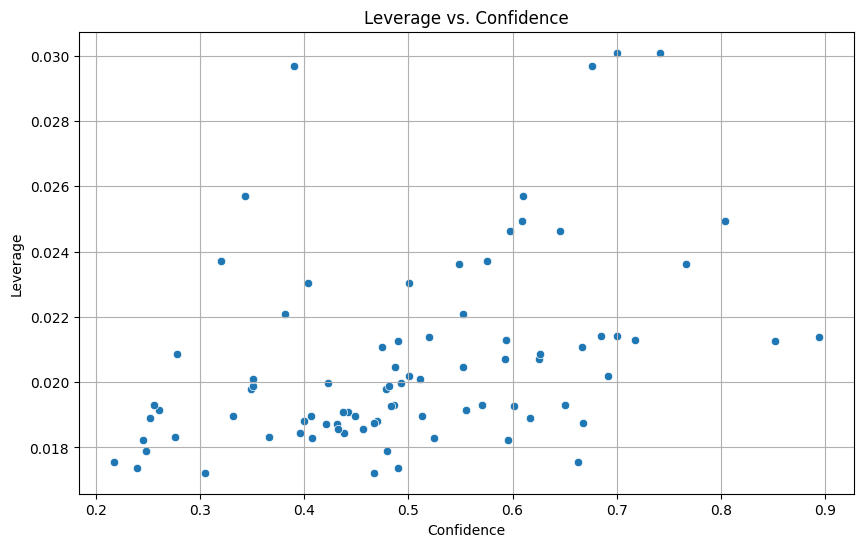

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.02)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='leverage', data=rules)
plt.title('Leverage vs. Confidence')
plt.xlabel('Confidence')
plt.ylabel('Leverage')
plt.grid(True)
plt.show()